In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
# to use matplotlib without Error and kerner restart
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
train_data.shape

(25000,)

In [5]:
train_data.ndim

1

In [6]:
type(train_data)

numpy.ndarray

In [7]:
type(train_data[0])

list

In [8]:
word_index = imdb.get_word_index()

In [9]:
type(word_index)

dict

In [10]:
reverse_word_index = dict(
                    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
                    [reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [11]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [12]:
import numpy as np
def vectorize_sequence(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [13]:
y_train = np.asarray(train_labels).astype('float')
y_test = np.asarray(test_labels).astype('float')

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [15]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [17]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=[x_val, y_val])

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 212us/sample - loss: 0.5281 - accuracy: 0.7836 - val_loss: 0.4199 - val_accuracy: 0.8333
Epoch 2/20
15000/15000 [==============================] - 1s 60us/sample - loss: 0.3177 - accuracy: 0.8991 - val_loss: 0.3109 - val_accuracy: 0.8863
Epoch 3/20
15000/15000 [==============================] - 1s 59us/sample - loss: 0.2336 - accuracy: 0.9227 - val_loss: 0.2896 - val_accuracy: 0.8839
Epoch 4/20
15000/15000 [==============================] - 1s 59us/sample - loss: 0.1831 - accuracy: 0.9401 - val_loss: 0.2762 - val_accuracy: 0.8902
Epoch 5/20
15000/15000 [==============================] - 1s 62us/sample - loss: 0.1495 - accuracy: 0.9526 - val_loss: 0.2755 - val_accuracy: 0.8877
Epoch 6/20
15000/15000 [==============================] - 1s 60us/sample - loss: 0.1252 - accuracy: 0.9601 - val_loss: 0.2864 - val_accuracy: 0.8873
Epoch 7/20
15000/15000 [==============================]

In [19]:
history_dict = history.history

In [20]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
import matplotlib.pyplot as plt

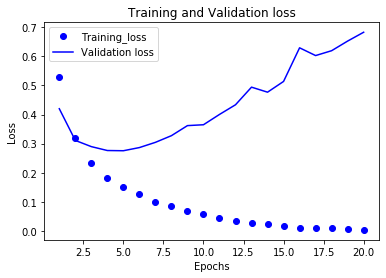

In [22]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training_loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


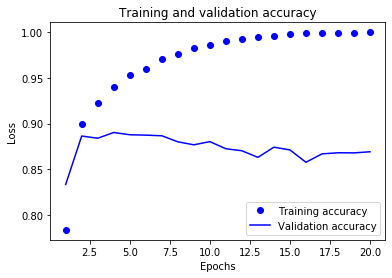

In [23]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [24]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train, epochs=4, batch_size = 512)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 85us/sample - loss: 0.4274 - accuracy: 0.8088
Epoch 2/4
25000/25000 [==============================] - 1s 51us/sample - loss: 0.2382 - accuracy: 0.9091
Epoch 3/4
25000/25000 [==============================] - 1s 50us/sample - loss: 0.1824 - accuracy: 0.9303
Epoch 4/4
25000/25000 [==============================] - 1s 49us/sample - loss: 0.1528 - accuracy: 0.9408


In [25]:
results = model.evaluate(x_test, y_test)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [26]:
results

[0.3157604187917709, 0.87824]

In [27]:
model.predict(x_test)

array([[0.16457462],
       [0.9998255 ],
       [0.9482158 ],
       ...,
       [0.14265546],
       [0.05959025],
       [0.8281586 ]], dtype=float32)

In [28]:
# 3.5 Classifying newswires:
# a multiclass classfication example

In [29]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


In [30]:
len(train_data)

8982

In [31]:
len(test_data)

2246

In [32]:
type(train_data)

numpy.ndarray

In [33]:
train_data.ndim

1

In [34]:
type(train_data[0])

list

In [35]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [36]:
train_labels[10]

3

In [37]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [38]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [39]:
x_train.shape

(8982, 10000)

In [40]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [41]:
train_labels[0]

3

In [42]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [75]:

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [76]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [77]:
x_val=x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                   par)

In [44]:
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [45]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [46]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [51]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 71us/sample - loss: 0.1081 - accuracy: 0.9569 - val_loss: 1.1769 - val_accuracy: 0.7860
Epoch 2/9
7982/7982 [==============================] - 1s 67us/sample - loss: 0.1094 - accuracy: 0.9573 - val_loss: 1.1471 - val_accuracy: 0.7970
Epoch 3/9
7982/7982 [==============================] - 1s 65us/sample - loss: 0.1049 - accuracy: 0.9577 - val_loss: 1.1200 - val_accuracy: 0.8070
Epoch 4/9
7982/7982 [==============================] - 1s 68us/sample - loss: 0.1029 - accuracy: 0.9593 - val_loss: 1.2645 - val_accuracy: 0.7890
Epoch 5/9
7982/7982 [==============================] - 1s 67us/sample - loss: 0.1020 - accuracy: 0.9583 - val_loss: 1.1861 - val_accuracy: 0.8060
Epoch 6/9
7982/7982 [==============================] - 1s 73us/sample - loss: 0.1006 - accuracy: 0.9585 - val_loss: 1.1587 - val_accuracy: 0.8110
Epoch 7/9
7982/7982 [==============================] - 1s 65us/sample - loss

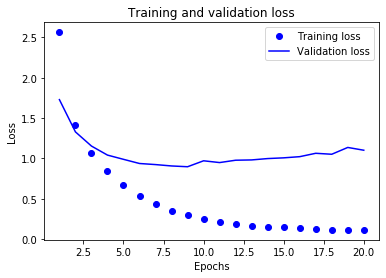

In [49]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [50]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24])

In [52]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [53]:
results

[1.3670977113083442, 0.777382]

In [54]:
predictions = model.predict(x_test)

In [55]:
predictions[0].shape

(46,)

In [56]:
x_test.shape

(2246, 10000)

In [58]:
predictions.shape

(2246, 46)

In [59]:
# 3.6 Predicting house prices: a regression example

In [60]:
# loading the boston housing dataset

from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [61]:
train_data.shape

(404, 13)

In [62]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [64]:
train_targets.shape

(404,)

In [65]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [66]:
mean.shape

(13,)

In [70]:
train_data.shape[1]

13

In [71]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                          input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


In [83]:
# k-fold validation
k = 4
num_val_samples = len(train_data) // 4
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold # ', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i+1) * num_val_samples:]],
    axis = 0)
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i+1) * num_val_samples:]],
    axis = 0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    #print((history.history).keys())
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold #  0
processing fold #  1
processing fold #  2
processing fold #  3


In [93]:
len(all_mae_histories)

4

In [86]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

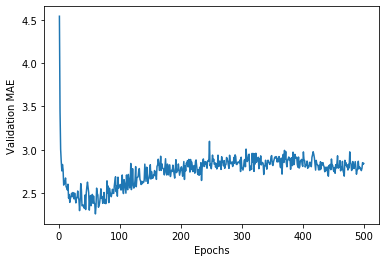

In [87]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [100]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
            
    return smoothed_points


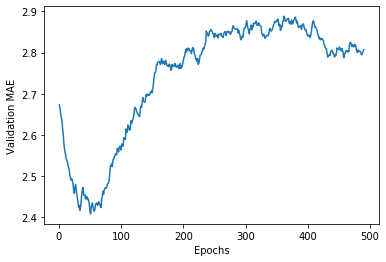

In [103]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()